In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
df = pd.read_csv('students_simple.csv')
df.head()
data = df.iloc[:,[0,5]]
data.head()
height = data['height']
age = data['age']

In [2]:
med_x = np.median(height)
med_y = np.median(age)
sign_x = np.sign(height - med_x)
sign_y = np.sign(age - med_y)
non_zero = (sign_x != 0) & (sign_y != 0)
agreed = np.sum(sign_x[non_zero] == sign_y[non_zero]) #проверяем выше или ниже медианы, берем -1 и 1, проверяем по паре значений
disagreed = np.sum(sign_x[non_zero] != sign_y[non_zero])  
fechner = (agreed - disagreed) / (agreed + disagreed) if (agreed + disagreed) > 0 else 0
print(f"Корреляция Фехнера: {fechner:.3f}")

Корреляция Фехнера: 0.111


In [3]:
r, p = stats.pearsonr(height, age)
print("Корреляция Пирсона:", r)  #проверяем насколько ложится в линейную зависимость, p value > 0,05 значит связь не значима
print("P-value:", p)

Корреляция Пирсона: 0.19437455140867985
P-value: 0.4115474738488907


In [4]:
z = np.arctanh(r)
n = len(height)
se_z = 1 / np.sqrt(n - 3)
z_critical = 1.96
ci_lower_z = z - z_critical * se_z 
ci_upper_z = z + z_critical * se_z  #Фишер и доверительный интервал
ci_lower_r = np.tanh(ci_lower_z) 
ci_upper_r = np.tanh(ci_upper_z) 
print(f"z-трансформация: {z:.4f}")
print(f"Стандартная ошибка z: {se_z:.4f}")
print(f"95% ДИ в z-пространстве: [{ci_lower_z:.4f}, {ci_upper_z:.4f}]")
print(f"95% ДИ для r: [{ci_lower_r:.4f}, {ci_upper_r:.4f}]")

z-трансформация: 0.1969
Стандартная ошибка z: 0.2425
95% ДИ в z-пространстве: [-0.2785, 0.6722]
95% ДИ для r: [-0.2715, 0.5865]


In [5]:
spearman_r, spearman_p = stats.spearmanr(height, age)
print(f"Корреляция Спирмена: {spearman_r:.3f}, p-value: {spearman_p:.3f}")

Корреляция Спирмена: 0.175, p-value: 0.460


In [6]:
kendall_r, kendall_p = stats.kendalltau(height, age)
print(f"Корреляция Кенделла: {kendall_r:.3f}, p-value: {kendall_p:.3f}")

Корреляция Кенделла: 0.122, p-value: 0.470


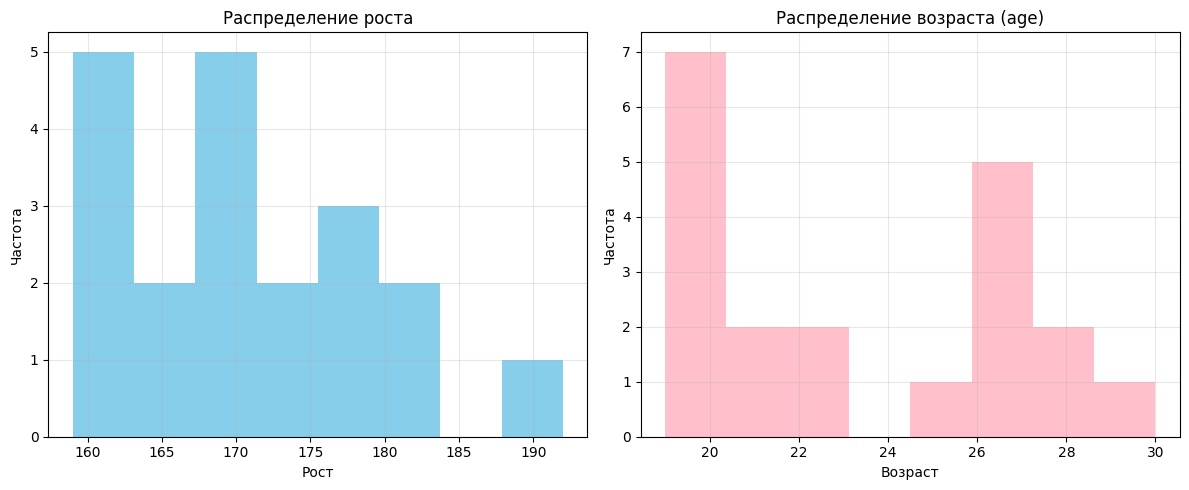

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

axes[0].hist(df['height'], bins=8, color='skyblue')
axes[0].set_title('Распределение роста')
axes[0].set_xlabel('Рост')
axes[0].set_ylabel('Частота')
axes[0].grid(True, alpha=0.3)

axes[1].hist(df['age'], bins=8, color='pink')
axes[1].set_title('Распределение возраста (age)')
axes[1].set_xlabel('Возраст')
axes[1].set_ylabel('Частота')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()

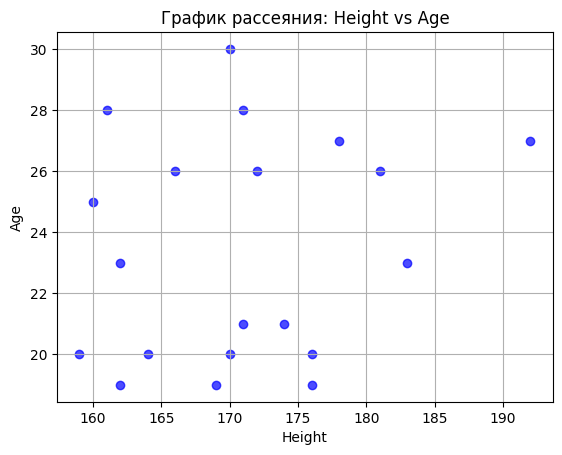

In [10]:
plt.scatter(df['height'], df['age'], color='blue', alpha=0.7)
plt.title('График рассеяния: Height vs Age')
plt.xlabel('Height')
plt.ylabel('Age')
plt.grid(True)

Text(0.5, 1.0, 'Линейная регрессия')

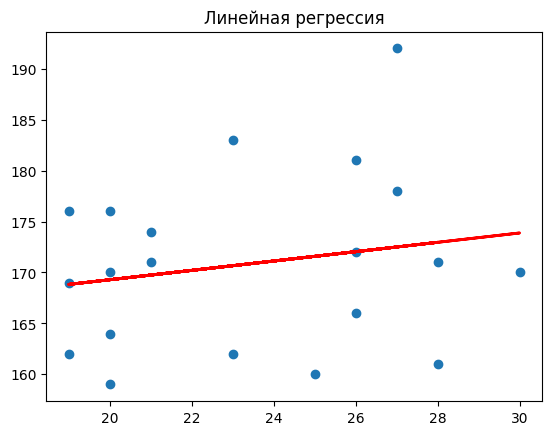

In [49]:
x = df['age'].values
y = df['height'].values

x_mean = np.mean(x)
y_mean = np.mean(y)
w1_lin = np.sum((x - x_mean)*(y - y_mean)) / np.sum((x - x_mean)**2)
w0_lin = y_mean - w1_lin * x_mean

plt.scatter(x, y)  
plt.plot(x, w1_lin * x + w0_lin, color='red', linewidth=2)  

plt.title("Линейная регрессия")

Text(0.5, 1.0, 'Квадратичная регрессия')

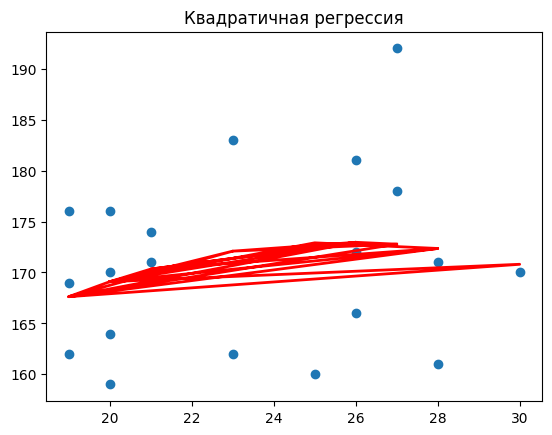

In [53]:
X_quad = np.vstack([x**2, x, np.ones_like(x)]).T
w_quad = np.linalg.lstsq(X_quad, y, rcond=None)[0] # [w2, w1, w0]
y_pred_quad = w_quad[0]*x**2 + w_quad[1]*x + w_quad[2]
plt.scatter(x, y)
plt.plot(x, y_pred_quad, color='red', linewidth=2)
plt.title("Квадратичная регрессия")

Text(0.5, 1.0, 'Гиперболическая регрессия')

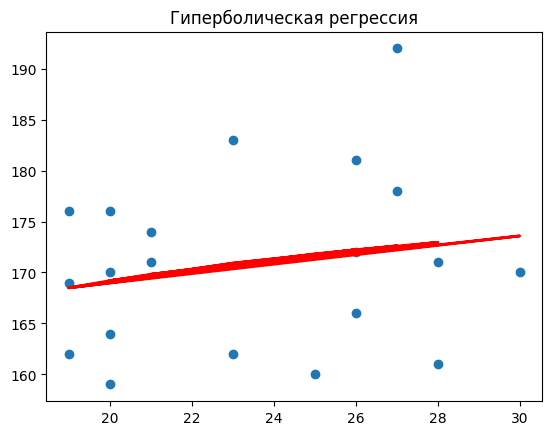

In [55]:
X_hyp = np.vstack([1/x, np.ones_like(x)]).T
w_hyp = np.linalg.lstsq(X_hyp, y, rcond=None)[0]  # [w1, w0]

y_pred_hyp = w_hyp[0]/x + w_hyp[1]
plt.scatter(x, y)
plt.plot(x, y_pred_hyp, color='red', linewidth=2)
plt.title("Гиперболическая регрессия")

Text(0.5, 1.0, 'Показательная регрессия')

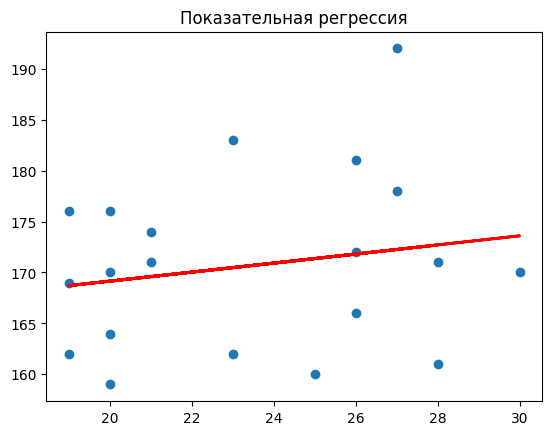

In [56]:
y_pos = y[y > 0]
x_pos = x[y > 0]

ln_y = np.log(y_pos)
X_exp = np.vstack([x_pos, np.ones_like(x_pos)]).T
w_exp = np.linalg.lstsq(X_exp, ln_y, rcond=None)[0]  # [w0, ln(w1)]

w0_exp = w_exp[0]
w1_exp = np.exp(w_exp[1])

y_pred_exp = w1_exp * np.exp(w0_exp * x_pos)
plt.scatter(x, y)
plt.plot(x_pos, y_pred_exp, color='red', linewidth=2)
plt.title("Показательная регрессия")

In [57]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

mse_lin  = mse(y, y_pred_lin)
mse_quad = mse(y, y_pred_quad)
mse_hyp  = mse(y, y_pred_hyp)
mse_exp  = mse(y_pos, y_pred_exp)  # только для положительных y

print(f"Линейная: {mse_lin:.3f}")
print(f"Квадратичная: {mse_quad:.3f}")
print(f"Гиперболическая: {mse_hyp:.3f}")
print(f"Показательная: {mse_exp:.3f}")

Линейная: 64.636
Квадратичная: 66.184
Гиперболическая: 67.071
Показательная: 67.434


In [58]:
def f_test(y_true, y_pred, k):
    n = len(y_true)
    y_mean = np.mean(y_true)
    SSR = np.sum((y_pred - y_mean)**2)  # объяснённая сумма квадратов
    SSE = np.sum((y_true - y_pred)**2)  # остаточная сумма квадратов
    SST = np.sum((y_true - y_mean)**2)  # полная сумма квадратов
    
    MSR = SSR / k                      # средняя объяснённая
    MSE = SSE / (n - k - 1)            # средняя остаточная
    F = MSR / MSE                      # F-статистика
    p_value = stats.f.sf(F, k, n - k - 1)  # p-value

    return F, p_value, SSR, SSE, SST

F_quad, p_quad, SSR_quad, SSE_quad, SST_quad = f_test(y, y_pred_quad, k=2)

F_exp, p_exp, SSR_exp, SSE_exp, SST_exp = f_test(y_pos, y_pred_exp, k=1)

print(f"Квадратичная модель: F = {F_quad:.3f}, p = {p_quad:.4f}")
print(f"Показательная модель: F = {F_exp:.3f}, p = {p_exp:.4f}")

alpha = 0.05
print("\nИнтерпретация:")
print("Квадратичная модель — значима" if p_quad < alpha else "Квадратичная модель — незначима")
print("Показательная модель — значима" if p_exp < alpha else "Показательная модель — незначима")

Квадратичная модель: F = 0.494, p = 0.6189
Показательная модель: F = 0.670, p = 0.4237

Интерпретация:
Квадратичная модель — незначима
Показательная модель — незначима
